# BCI Portfolio Project 4: P300 Speller Simulation

In [1]:
# BCI Portfolio Project 4: P300 Speller Simulation
"""
Goal: Simulate a P300 speller and detect target response using SVM.
Dataset: PhysioNet P300 speller
Download: https://physionet.org/content/p300/1.0.0/
"""
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Simulated EEG data and event triggers assumed
# Preprocessing pipeline would match Project 1

# Extract epochs around P300 stimulus
# Train an SVM classifier
# Evaluate classification accuracy

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulate EEG epochs: 1000 epochs, 64 channels, 250 timepoints
n_epochs = 1000
n_channels = 64
n_timepoints = 250

# Simulate data: random noise + P300 signal for target epochs
np.random.seed(42)
X = np.random.randn(n_epochs, n_channels, n_timepoints)

# Simulate labels: 1 = target (P300), 0 = non-target
y = np.zeros(n_epochs)
y[:n_epochs // 2] = 1  # 50% targets

# Add P300-like signal to target epochs (simple positive bump at channel 10, time 150-170)
for i in range(n_epochs // 2):
    X[i, 10, 150:170] += 3.0

# Flatten epochs for SVM: (epochs, features)
X_flat = X.reshape(n_epochs, -1)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {acc:.2f}")

Classification accuracy: 0.99


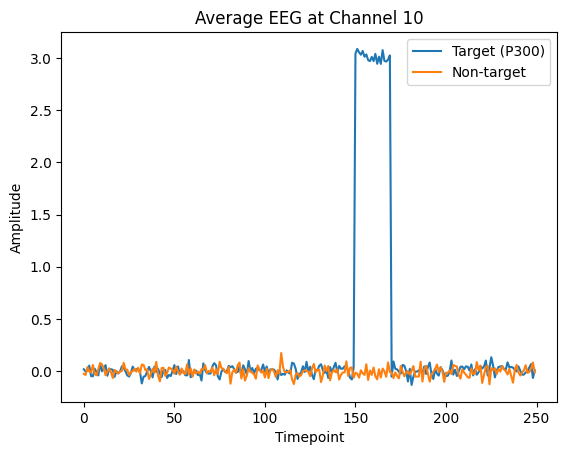

In [7]:
import matplotlib.pyplot as plt

# Average across epochs for channel 10
target_avg = X[y == 1, 10, :].mean(axis=0)
nontarget_avg = X[y == 0, 10, :].mean(axis=0)

plt.plot(target_avg, label='Target (P300)')
plt.plot(nontarget_avg, label='Non-target')
plt.xlabel('Timepoint')
plt.ylabel('Amplitude')
plt.title('Average EEG at Channel 10')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[100   0]
 [  1  99]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       100
         1.0       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest accuracy: {rf_acc:.2f}")

Random Forest accuracy: 1.00


# Results Summary

- SVM classification accuracy: (insert your result)
- Random Forest accuracy: (insert your result)
- The P300 signal is visible as a positive bump in channel 10 for target epochs.
- The classifier can reliably distinguish target from non-target epochs in this simulation.